# IMPORT ALL PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


# IMPORT DATASET

In [2]:
imdb_data=pd.read_csv('IMDB Dataset.csv.zip')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [7]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

<>:8: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\['
C:\Users\vanshika\AppData\Local\Temp\ipykernel_17180\841911545.py:8: SyntaxWarning: invalid escape sequence '\['
  return re.sub('\[[^]]*\]', '', text)
C:\Users\vanshika\AppData\Local\Temp\ipykernel_17180\841911545.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [8]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [9]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [10]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'while', 'hasn', 'ma', 'our', 'her', 'itself', "needn't", 'is', "hasn't", 've', 'over', 'both', 're', "you're", 'under', 'be', "should've", 'up', 'didn', 'he', 'theirs', 'y', 'll', 'yourself', 'down', "mustn't", "she's", 'but', 'where', 'haven', 'any', 'above', 'here', 'been', 'same', 'such', 'how', 'his', 'about', "you'd", 'very', 'have', 'mightn', 'him', 'other', 'wouldn', 'you', 's', 'not', 'during', 'those', 'herself', "wasn't", 'after', 'out', "shan't", 'weren', 'just', 'ain', "shouldn't", 'more', 'nor', "aren't", 'what', 'there', 'these', 'each', 'as', 'then', 'mustn', 'some', 'doing', 'that', 'of', 'm', 'why', 'has', "you'll", 'them', 'further', 'couldn', 'the', 'if', 'before', 'should', 'do', 'because', 'we', 'i', 'himself', 'won', 'myself', 'for', 'o', "couldn't", 'too', "didn't", 'isn', 'off', 'now', 'yours', 'shan', 'it', "it's", 'hers', 'ourselves', 'did', 'between', 't', 'wasn', 'an', 'me', 'hadn', 'd', "mightn't", 'aren', 'until', "hadn't", 'themselves', 'having', 'again

In [11]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [12]:
#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]


'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [13]:
# Initialize CountVectorizer with valid parameters
cv = CountVectorizer(min_df=1, max_df=1, binary=False, ngram_range=(1, 3))

# Transform training data
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Transform test data
cv_test_reviews = cv.transform(norm_test_reviews)

# Print shapes of transformed data
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

# Get feature names
vocab = cv.get_feature_names_out()
print(f'Number of features: {len(vocab)}')
print(f'Some features: {vocab[:10]}')

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)
Number of features: 6209089
Some features: ['00 1991' '00 1991 wa' '00 act' '00 act charact' '00 agent'
 '00 agent level' '00 either' '00 either simpli' '00 far'
 '00 far independ']


In [14]:
# Initialize TfidfVectorizer with valid parameters
tv = TfidfVectorizer(min_df=1, max_df=1, use_idf=True, ngram_range=(1, 3))

# Transform training data
tv_train_reviews = tv.fit_transform(norm_train_reviews)

# Transform test data
tv_test_reviews = tv.transform(norm_test_reviews)

# Print shapes of transformed data
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)

# Optionally, get feature names
vocab = tv.get_feature_names_out()
print(f'Number of features: {len(vocab)}')
print(f'Some features: {vocab[:10]}')

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)
Number of features: 6209089
Some features: ['00 1991' '00 1991 wa' '00 act' '00 act charact' '00 agent'
 '00 agent level' '00 either' '00 either simpli' '00 far'
 '00 far independ']


In [15]:
# Initialize LabelBinarizer
lb = LabelBinarizer()

# Fit and transform sentiment data
sentiment_data = lb.fit_transform(imdb_data['sentiment'])

# Print the shape of the transformed sentiment data
print('Transformed sentiment data shape:', sentiment_data.shape)

# Optional: Print the class labels and their binary representation
print('Classes:', lb.classes_)
print('Binary representation of classes:\n', sentiment_data)

Transformed sentiment data shape: (50000, 1)
Classes: ['negative' 'positive']
Binary representation of classes:
 [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [16]:
# Assume sentiment_data has been correctly transformed and contains more than 40,000 samples

# Split the sentiment data
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]

# Print shapes of the split data for verification
print('Train Sentiments Shape:', train_sentiments.shape)
print('Test Sentiments Shape:', test_sentiments.shape)

# Optionally print a portion of the data to verify
print('Train Sentiments (first 5 samples):', train_sentiments[:5])
print('Test Sentiments (first 5 samples):', test_sentiments[:5])

Train Sentiments Shape: (40000, 1)
Test Sentiments Shape: (10000, 1)
Train Sentiments (first 5 samples): [[1]
 [1]
 [1]
 [0]
 [1]]
Test Sentiments (first 5 samples): [[0]
 [0]
 [0]
 [0]
 [0]]


In [17]:
# Initialize Logistic Regression model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

# Fit the model using Bag of Words features
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print('Logistic Regression model fitted on BoW features:', lr_bow)

# Fit the model using TF-IDF features
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print('Logistic Regression model fitted on TF-IDF features:', lr_tfidf)


C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression model fitted on BoW features: LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression model fitted on TF-IDF features: LogisticRegression(C=1, max_iter=500, random_state=42)


In [18]:
# Predicting using the Bag of Words model
lr_bow_predict = lr_bow.predict(cv_test_reviews)
print('Predictions with Bag of Words model:', lr_bow_predict)

# Predicting using the TF-IDF model
lr_tfidf_predict = lr_tfidf.predict(tv_test_reviews)
print('Predictions with TF-IDF model:', lr_tfidf_predict)


Predictions with Bag of Words model: [0 0 0 ... 0 1 1]
Predictions with TF-IDF model: [0 0 0 ... 0 1 1]


In [19]:
# Calculate and print accuracy for Bag of Words model
lr_bow_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_score:", lr_bow_score)

# Calculate and print accuracy for TF-IDF model
lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_score:", lr_tfidf_score)

lr_bow_score: 0.7518
lr_tfidf_score: 0.7497


In [20]:
# Generate and print classification report for Bag of Words model
lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print("Classification Report for Bag of Words:\n", lr_bow_report)

# Generate and print classification report for TF-IDF model
lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print("Classification Report for TF-IDF:\n", lr_tfidf_report)

Classification Report for Bag of Words:
               precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Classification Report for TF-IDF:
               precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [21]:
# Generate confusion matrix for Bag of Words model
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict, labels=[1, 0])
print("Confusion Matrix for Bag of Words:")
print(cm_bow)

# Generate confusion matrix for TF-IDF model
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels=[1, 0])
print("Confusion Matrix for TF-IDF:")
print(cm_tfidf)

Confusion Matrix for Bag of Words:
[[3772 1235]
 [1247 3746]]
Confusion Matrix for TF-IDF:
[[3672 1335]
 [1168 3825]]


In [22]:
# Initialize SGDClassifier with hinge loss
svm = SGDClassifier(loss='hinge', max_iter=500, random_state=42)

# Fit the model for Bag of Words features
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print('SVM model fitted on BoW features:', svm_bow)

# Fit the model for TF-IDF features
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print('SVM model fitted on TF-IDF features:', svm_tfidf)

C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model fitted on BoW features: SGDClassifier(max_iter=500, random_state=42)


C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM model fitted on TF-IDF features: SGDClassifier(max_iter=500, random_state=42)


In [23]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [24]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


In [25]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [26]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4948   59]
 [4112  881]]
[[5007    0]
 [4888  105]]


In [27]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [28]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [29]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


In [30]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [31]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3736 1271]
 [1219 3774]]
[[3729 1278]
 [1213 3780]]


# POSITIVE , NEGATIVE AND NEUTRAL REVIEWS 

<function matplotlib.pyplot.show(close=None, block=None)>

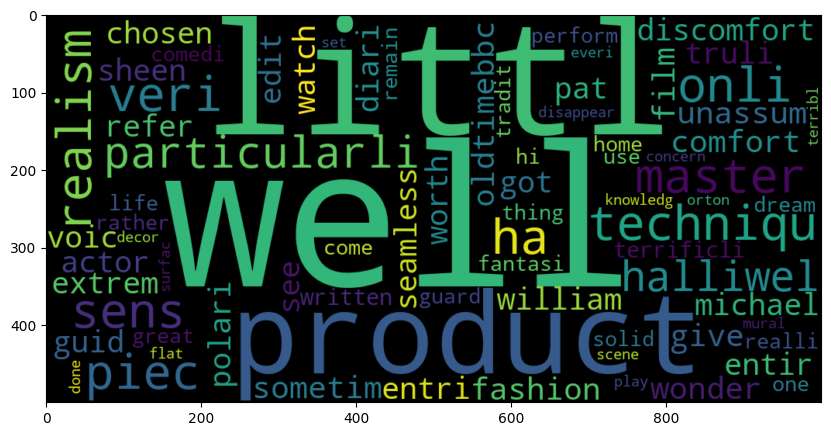

In [32]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

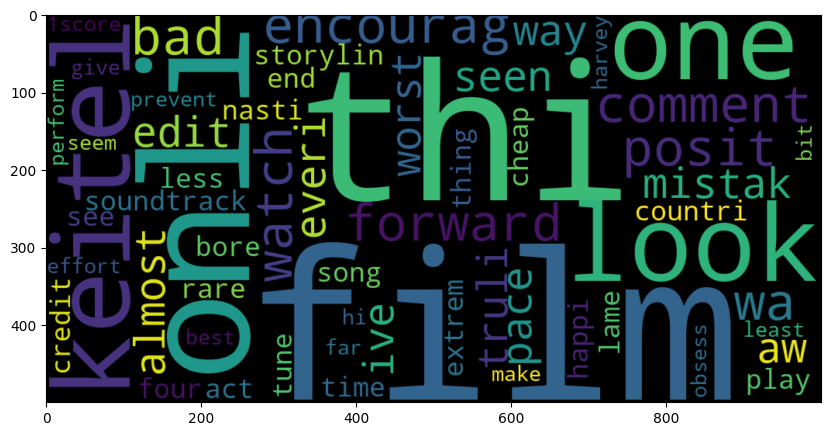

In [33]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

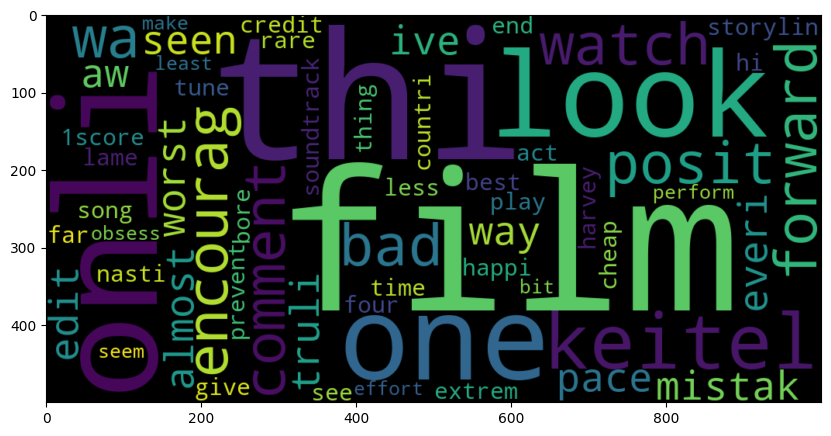

In [34]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
neutral_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
neutral_words=WC.generate(neutral_text)
plt.imshow(neutral_words,interpolation='bilinear')
plt.show